In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import altair as alt

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
pd.options.display.float_format = "{:.2f}".format

In [5]:
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

## Re-Construct H&M Sections

In [6]:
df_trans = pd.read_csv("../data/transactions_train.csv").assign(
    t_dat=lambda d: pd.to_datetime(d["t_dat"])
)

In [7]:
df_articles = pd.read_csv("../data/articles.csv")

### Join Article and Transaction Data

In [10]:
df = df_trans.merge(df_articles, on="article_id", how="left")

In [13]:
df.isna().mean()

t_dat                          0.00
customer_id                    0.00
article_id                     0.00
price                          0.00
sales_channel_id               0.00
product_code                   0.00
prod_name                      0.00
product_type_no                0.00
product_type_name              0.00
product_group_name             0.00
graphical_appearance_no        0.00
graphical_appearance_name      0.00
colour_group_code              0.00
colour_group_name              0.00
perceived_colour_value_id      0.00
perceived_colour_value_name    0.00
perceived_colour_master_id     0.00
perceived_colour_master_name   0.00
department_no                  0.00
department_name                0.00
index_code                     0.00
index_name                     0.00
index_group_no                 0.00
index_group_name               0.00
section_no                     0.00
section_name                   0.00
garment_group_no               0.00
garment_group_name          

## Sections

In [40]:
df_sections = (
    df.groupby(["t_dat", "section_no", "section_name", "article_id"])
    .agg(num_sales=("price", "count"))
    .sort_values("num_sales", ascending=False)
)

In [41]:
df_sections

num_sales
t_dat      section_no section_name               article_id           
2019-06-13 60         Womens Swimwear, beachwear 758064001        2733
                                                 758060001        2361
                                                 758049001        2087
                                                 758050001        2052
                                                 758084002        1739
...                                                                ...
2019-08-03 79         Girls Underwear & Basics   619739037           1
                                                 619739057           1
                                                 619764009           1
                                                 620197032           1
2020-09-22 97         Collaborations             829031002           1

[7443545 rows x 1 columns]

<AxesSubplot:xlabel='t_dat'>

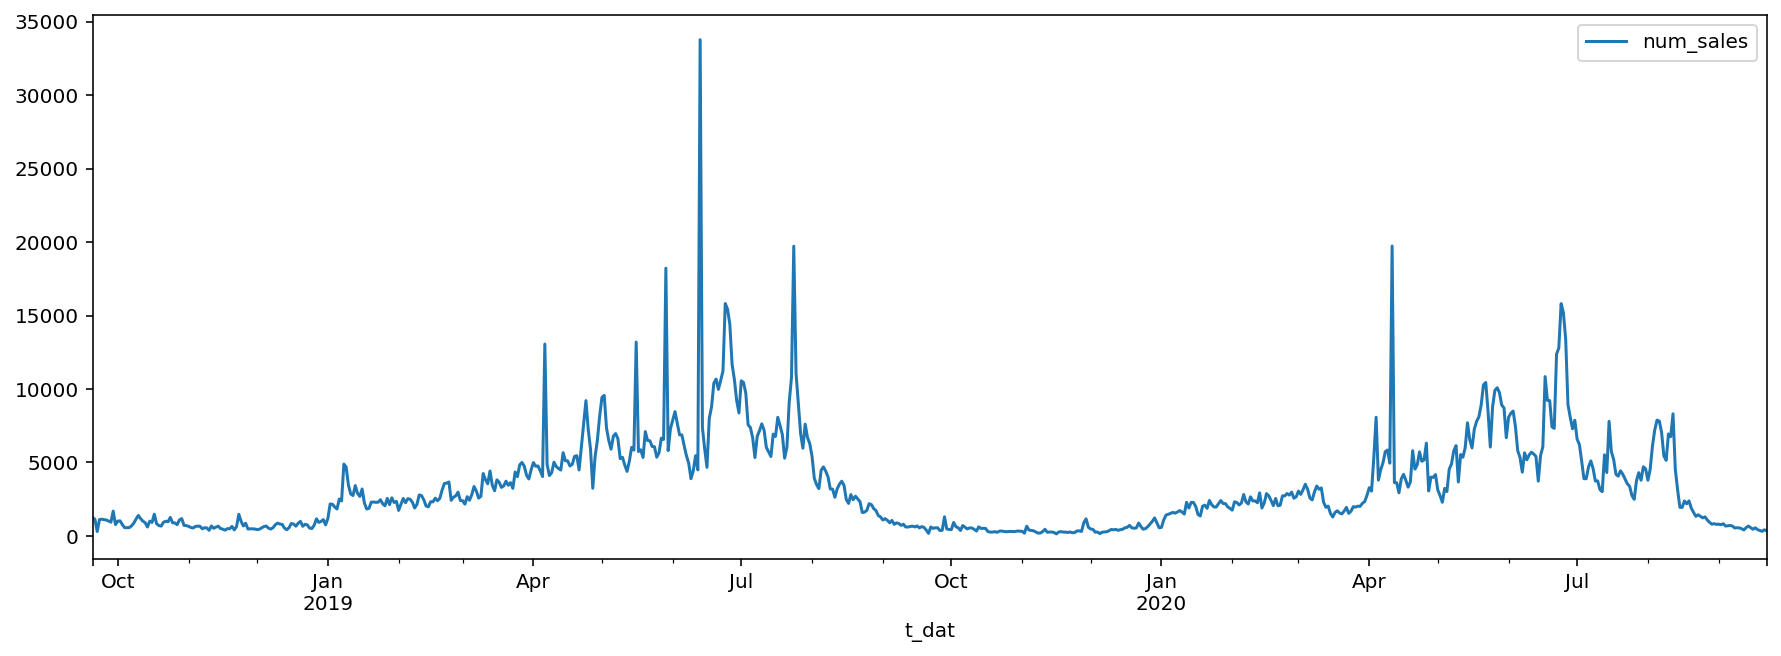

In [67]:
df_swimwear = (
    df_sections[df_sections.index.isin([60], level=1)]
    .reset_index()
    .groupby(["t_dat"])
    .agg(num_sales=("num_sales", "sum"))
)

df_swimwear.plot.line(y="num_sales", figsize=(15, 5))